<a href="https://colab.research.google.com/github/nishaz/SC2001-LabsT7/blob/main/SC2001_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random, csv, time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter


# Sorting Algorithms



*   Merge Sort
*   Insertion Sort
*   Hybrid Sort






In [ ]:
# Insertion Sort
def insertion_sort(arr, left, right, counter):
    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left:
            counter[0] += 1  # comparison
            if arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            else:
                break
        arr[j + 1] = key

# Merge Function
def merge(arr, left, mid, right, counter):
    n1 = mid - left + 1
    n2 = right - mid

    L = arr[left:left + n1]
    R = arr[mid + 1:mid + 1 + n2]

    i = j = 0
    k = left

    while i < n1 and j < n2:
        counter[0] += 1  # comparison
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

# Standard MergeSort
def merge_sort(arr, left, right, counter):
    if left < right:
        mid = (left + right) // 2
        merge_sort(arr, left, mid, counter)
        merge_sort(arr, mid + 1, right, counter)
        merge(arr, left, mid, right, counter)

# Hybrid MergeSort (threshold S)
def hybrid_merge_sort(arr, left, right, counter, S):
    if right - left + 1 <= S:
        insertion_sort(arr, left, right, counter)
    else:
        if left < right:
            mid = (left + right) // 2
            hybrid_merge_sort(arr, left, mid, counter, S)
            hybrid_merge_sort(arr, mid + 1, right, counter, S)
            merge(arr, left, mid, right, counter)

# Run Experiment

1.   Initialise experiment 1: Varying n, fixed s
2.   Initialise experiment 2: Varying s, fixed n
3.   Initialise export experiment results
4.    Generate datasets with range of array size n and threshold s
5.   Run Code



In [ ]:
# Experiment
def experiment_vary_n(ns, fixed_s, trials):
    results = []
    for n in ns:
        hybrid_counts, hybrid_times = [], []
        for _ in range(trials):
            arr = [random.randint(0, x) for _ in range(n)]
            count_hybrid = [0]
            start = time.perf_counter()
            hybrid_merge_sort(arr.copy(), 0, n-1, count_hybrid, fixed_s)
            end = time.perf_counter()
            hybrid_counts.append(count_hybrid[0])
            hybrid_times.append(end - start)

        results.append({
            "n": n,
            "s": fixed_s,
            "hybrid_count": sum(hybrid_counts) / trials,
            "hybrid_time": sum(hybrid_times) / trials
        })
    return results


def experiment_vary_s(ss, fixed_n, trials):
    results = []
    for s in ss:
        hybrid_counts, hybrid_times = [], []
        for _ in range(trials):
            arr = [random.randint(0, x) for _ in range(fixed_n)]
            count_hybrid = [0]
            start = time.perf_counter()
            hybrid_merge_sort(arr.copy(), 0, fixed_n-1, count_hybrid, s)
            end = time.perf_counter()
            hybrid_counts.append(count_hybrid[0])
            hybrid_times.append(end - start)

        results.append({
            "n": fixed_n,
            "s": s,
            "hybrid_count": sum(hybrid_counts) / trials,
            "hybrid_time": sum(hybrid_times) / trials
        })
    return results


def experiment_zoomed_s_for_multiple_n(ns, ss, trials=10):
    results = []
    for n in ns:
        for s in ss:
            hybrid_counts, hybrid_times = [], []
            for _ in range(trials):
                arr = [random.randint(0, n) for _ in range(n)]
                count_hybrid = [0]
                start = time.perf_counter()
                hybrid_merge_sort(arr.copy(), 0, n - 1, count_hybrid, s)
                end = time.perf_counter()
                hybrid_counts.append(count_hybrid[0])
                hybrid_times.append(end - start)

            results.append({
                "n": n,
                "s": s,
                "hybrid_count": sum(hybrid_counts) / trials,
                "hybrid_time": sum(hybrid_times) / trials
            })
    return results


In [ ]:
# Export results to csv file
def save_results_to_csv(filename, results):
    keys = results[0].keys()
    with open(filename, "w", newline="") as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        writer.writerows(results)

In [ ]:
# Generate datasets
n = [1000, 10000, 100000, 1000000, 10000000] # sizes for n
x = 1000 # max value allowed in array
s = list(range(1,30)) # threshold s for hybrid sort (if subarr<S, use insertion sort instead of recrusive mergesort)
n_fixed = 50000
s_fixed = 10

In [ ]:
# Run code
res_n = experiment_vary_n(n, s_fixed, trials=10)
res_s = experiment_vary_s(s, n_fixed, trials=10)

save_results_to_csv("results_vary_n.csv", res_n)
save_results_to_csv("results_vary_s.csv", res_s)

In [ ]:
# Read Experiment fixed s, varying n
df = pd.read_csv("results_vary_n.csv")
df.head()

,n,s,hybrid_count,hybrid_time
0,1000,10,9055.0,0.003050
1,10000,10,127066.0,0.027976
2,100000,10,1557277.0,0.310208
3,1000000,10,19067628.0,5.905928
4,10000000,10,226336646.0,65.388835


In [ ]:
# Read Experiment fixed n, varying s
df = pd.read_csv("results_vary_s.csv")
df.head()

,n,s,hybrid_count,hybrid_time
0,50000,1,718064.0,0.301115
1,50000,2,717941.0,0.158130
2,50000,3,717748.0,0.148699
3,50000,4,718364.0,0.161322
4,50000,5,718445.0,0.142558


# Plot Experiment Results
1. Initialise Plot function
2. Plot graph comparison for hybrid time complexity and comparison count, for both experiments


In [ ]:
def plot_results(df, x_col, y_col, title, xlabel, ylabel, theory_col):
    plt.figure(figsize=(8, 5))

    sns.lineplot(data=df, x=x_col, y=y_col, marker='o', label="Empirical", estimator=None)
    # Theoretical results (optional)
    theory_col = 'theory_count' if 'count' in y_col else 'theory_time'
    sns.lineplot(data=df, x=x_col, y=theory_col, marker='s', label='Theoretical', linestyle='--')  # dashed line

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Enforce scientific formatting consistently
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.yaxis.get_major_formatter().set_scientific(True)
    ax.yaxis.get_major_formatter().set_powerlimits((5, -5))

    plt.grid(True)
    plt.tight_layout()
    plt.show()




In [ ]:
# Load results from CSV files
df_n = pd.read_csv("results_vary_n.csv")  # For varying n, fixed S
df_s = pd.read_csv("results_vary_s.csv")  # For varying S, fixed n


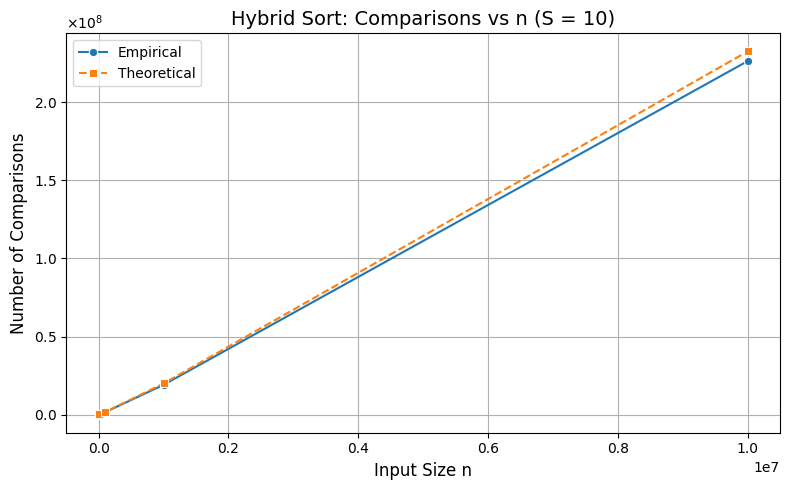

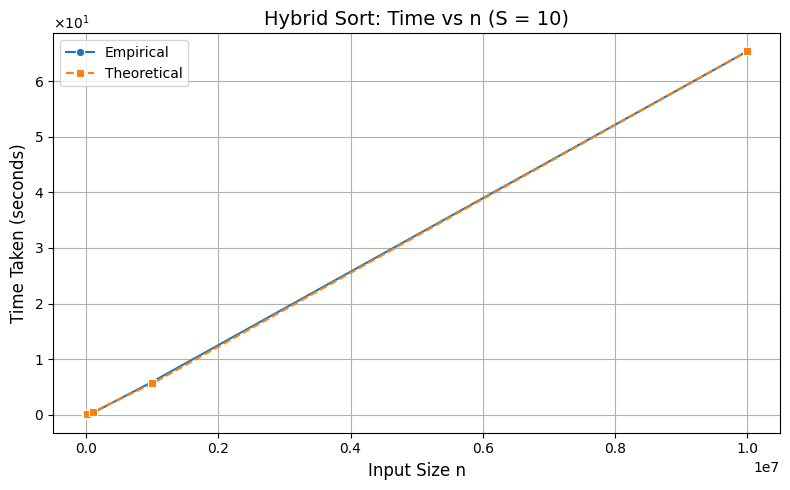

In [ ]:
# Theoretical comparisons ~ n log n
df_n['theory_count'] = df_n['n'] * np.log2(df_n['n'])

# Theoretical time ~ n log n (scaled to seconds)
scale_time = df_n['hybrid_time'].iloc[-1] / df_n['theory_count'].iloc[-1]
df_n['theory_time'] = df_n['theory_count'] * scale_time

# Plot number of comparisons vs n (fixed S = 10)
plot_results(
    df_n,
    x_col='n',
    y_col='hybrid_count',
    title='Hybrid Sort: Comparisons vs n (S = 10)',
    xlabel='Input Size n',
    ylabel='Number of Comparisons',
    theory_col='theory_count'
)

# Plot time taken vs n (fixed S = 10)
plot_results(
    df_n,
    x_col='n',
    y_col='hybrid_time',
    title='Hybrid Sort: Time vs n (S = 10)',
    xlabel='Input Size n',
    ylabel='Time Taken (seconds)',
    theory_col='theory_time'
)


**Experiment 1 (Varying n, set s):**

The graph above shows that the comaprisons and time taken to sort the hybrid sort increases as the input size n increases



---



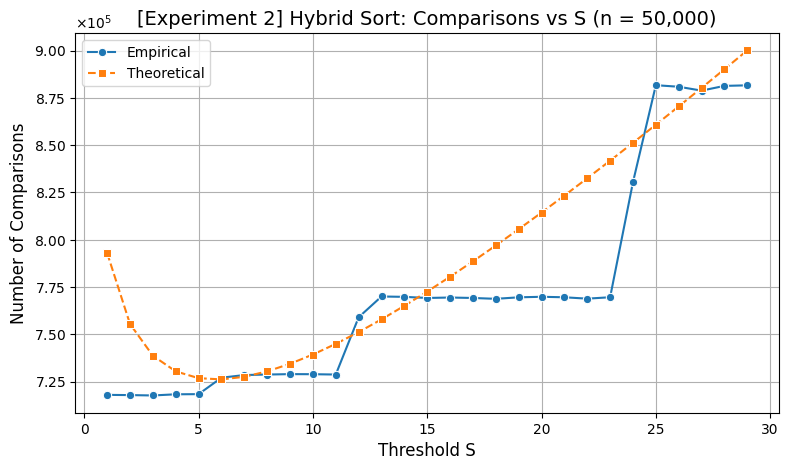

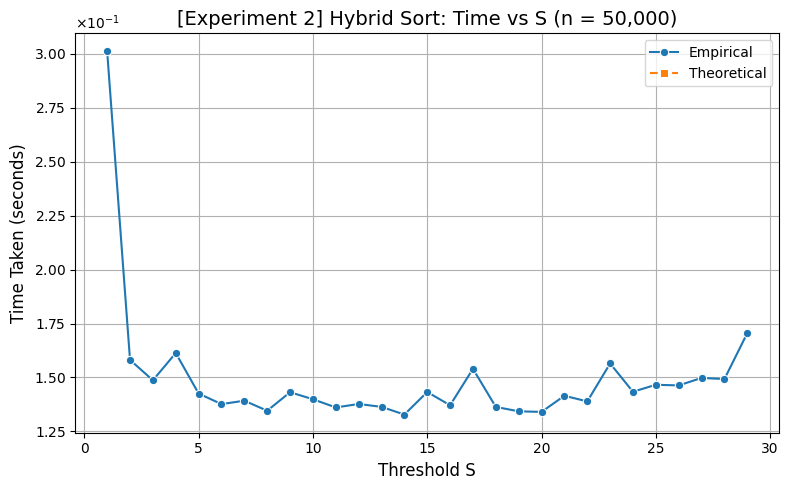

In [ ]:
constant = 0.25
df_s['theory_count'] = n_fixed * np.log2(n_fixed / df_s['s']) + (n_fixed / df_s['s']) * df_s['s']**2 * constant
scale_time_s = df_s['hybrid_time'].iloc[0] / df_s['theory_count'].iloc[0]
df_s['theory_time'] = None


plot_results(
    df_s,
    x_col='s',
    y_col='hybrid_count',
    title='[Experiment 2] Hybrid Sort: Comparisons vs S (n = 50,000)',
    xlabel='Threshold S',
    ylabel='Number of Comparisons',
    theory_col='theory_count'
)
plot_results(
    df_s,
    x_col='s',
    y_col='hybrid_time',
    title='[Experiment 2] Hybrid Sort: Time vs S (n = 50,000)',
    xlabel='Threshold S',
    ylabel='Time Taken (seconds)',
    theory_col='theory_time'
)

**Experiment 2: Varying s, set n:**

The following two plots show how the hybrid algorithm performs across different threshold values `S`, when sorting an input list of size 50,000. We observe a trade-off between the number of comparisons and the time taken, helping us empirically determine an optimal `S`.


---



###  Analysis: Optimal Threshold S

From the above plots for Experiment 2 (fixed `n = 50,000`, varying `S`), we observe the following:

- **Comparisons** generally **increase** as `S` increases. This is expected, as larger values of `S` mean more of the sorting work is delegated to Insertion Sort, which performs more comparisons on larger subarrays.
- However, **runtime (time taken)** actually **decreases slightly** as `S` increases from 10 to around 16. This counterintuitive result highlights an important insight: runtime efficiency doesn't always correlate directly with the number of comparisons.

This behavior can be explained as follows:

- When `S` is **too small**, the algorithm spends significant time on deep recursion and frequent merging — leading to more overhead, even if the number of comparisons is low.
- When `S` is **too large**, Insertion Sort handles large subarrays inefficiently — increasing comparisons, but potentially reducing function call overhead.

 In theory, the optimal `S` is around **6** (as found in literature), but due to **real-world factors** like:
- Function call overhead,
- Cache behavior,
- Memory access patterns,

…the **empirical optimal S** in our experiment lies between **10–16**, where runtime is minimized despite a slightly higher number of comparisons.





---
**Zoomed in S**

Based on the plot the time taken to sort decreases when the s threshold is between 10,15,20, and the comparison remains the same at 15, 20. So we will run experiment 2 again at trials=10 to get the average time taken for each s, zooming into this range of values to find the optimal s

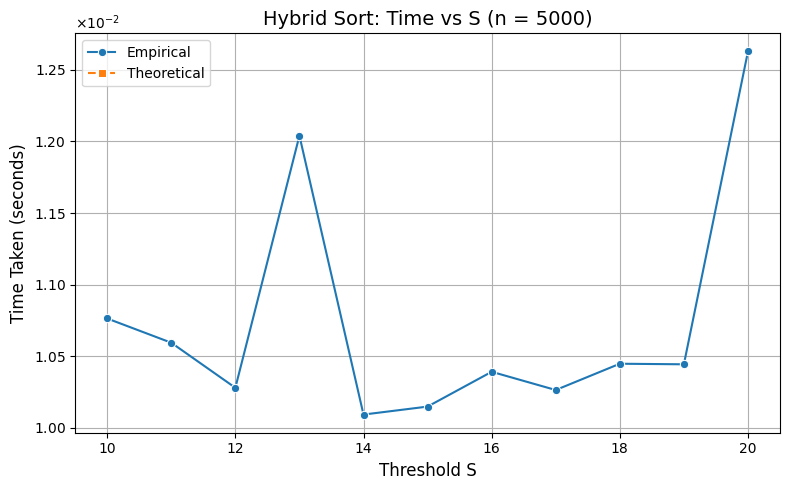

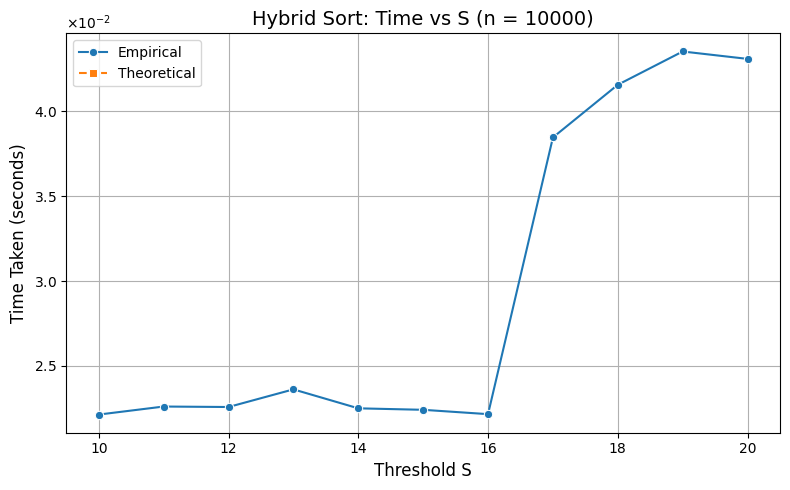

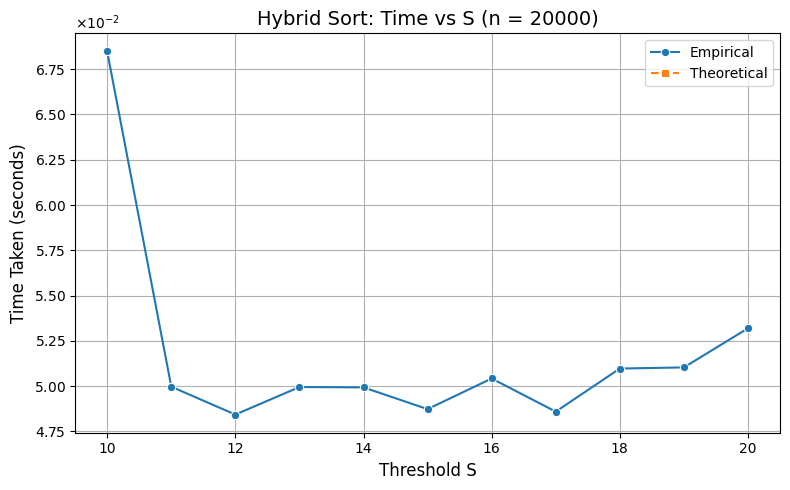

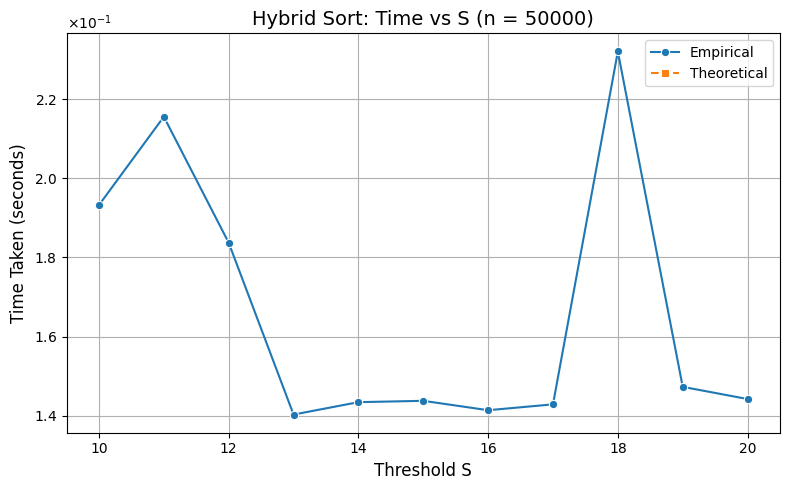

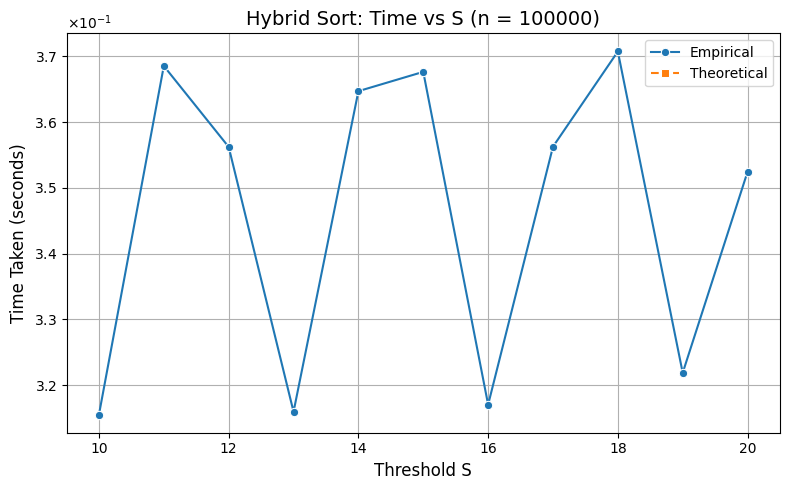

In [ ]:
zoomedInS = list(range(10, 21))      # S values 10 → 20
n_values  = [5000, 10000, 20000, 50000, 100000]    # example input sizes

# Run experiment
df_zoomed_multi = experiment_zoomed_s_for_multiple_n(n_values, zoomedInS, trials=10)

# Convert list of dicts to DataFrame
df_zoomed_multi = pd.DataFrame(df_zoomed_multi)

# Save to CSV
df_zoomed_multi.to_csv("results_zoomed_multi.csv", index=False)

df_zoomed_multi['theory_time'] = None

# Plot results
for n in n_values:
    subset = df_zoomed_multi[df_zoomed_multi['n'] == n]
    plot_results(
        subset,
        x_col='s',
        y_col='hybrid_time',
        title=f'Hybrid Sort: Time vs S (n = {n})',
        xlabel='Threshold S',
        ylabel='Time Taken (seconds)',
        theory_col='theory_time'
    )

**From the graph, Optimal S seems to be 15/16**

# Compare Original vs Hybrid
 Compare Merge with Hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers using optimal S found, and plot results to compare the 2 algorithm (reuse plot func above)

In [ ]:
# Generate 10 million integers
N = 10000000
optimal_S = 12  # using our best S here

arr = [random.randint(0, 1000) for _ in range(N)]

# Measure Merge Sort
arr_merge = arr.copy()
merge_count = [0]
start_merge = time.perf_counter()
merge_sort(arr_merge, 0, N - 1, merge_count)
end_merge = time.perf_counter()
merge_time = end_merge - start_merge

# Measure Hybrid Sort
arr_hybrid = arr.copy()
hybrid_count = [0]
start_hybrid = time.perf_counter()
hybrid_merge_sort(arr_hybrid, 0, N - 1, hybrid_count, optimal_S)
end_hybrid = time.perf_counter()
hybrid_time = end_hybrid - start_hybrid


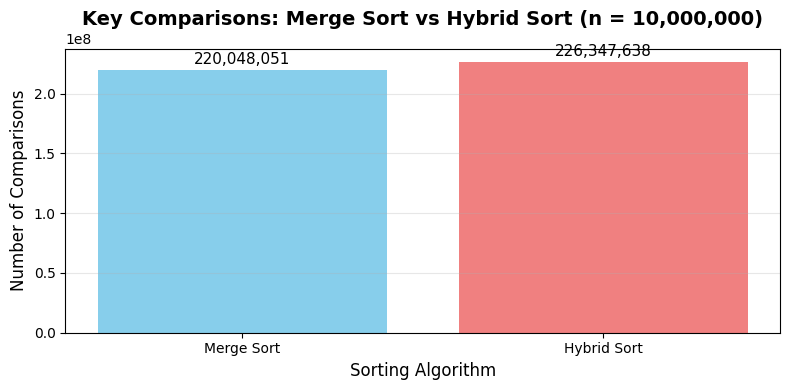

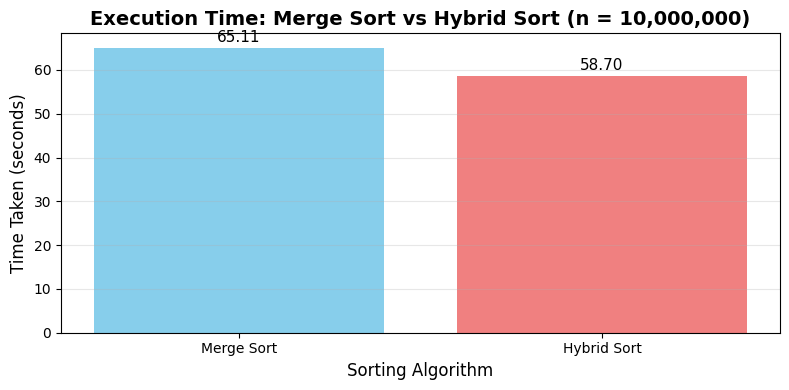

In [ ]:
compare_df = pd.DataFrame({
    "Algorithm": ["Merge Sort", "Hybrid Sort"],
    "Comparisons": [merge_count[0], hybrid_count[0]],
    "Time (s)": [merge_time, hybrid_time]
})

# Function to plot bar charts
def plot_bar_results(df, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(8, 4))
    bars = plt.bar(df[x_col], df[y_col], color=['skyblue', 'lightcoral'])
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(df[y_col])*0.01,
                f'{height:,.0f}' if 'Comparisons' in y_col else f'{height:.2f}',
                ha='center', va='bottom', fontsize=11)

    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot Comparisons
plot_bar_results(
    compare_df,
    x_col='Algorithm',
    y_col='Comparisons',
    title='Key Comparisons: Merge Sort vs Hybrid Sort (n = 10,000,000)',
    xlabel='Sorting Algorithm',
    ylabel='Number of Comparisons'
)

# Plot Time
plot_bar_results(
    compare_df,
    x_col='Algorithm',
    y_col='Time (s)',
    title='Execution Time: Merge Sort vs Hybrid Sort (n = 10,000,000)',
    xlabel='Sorting Algorithm',
    ylabel='Time Taken (seconds)'
)


# Hybrid vs. Original

Dataset: 10,000,000 integers, optimal S is around 16

Key comparisons

*   Merge sort: ~220,048,886
*   Hybrid (S=16): ~226,351,233
*   Result: Hybrid does ~2.9% more comparisons.

CPU time

*   Merge sort: ~65.53s
*   Hybrid (S=16): ~59.33s
*   Result: Hybrid is ~9% faster despite more comparisons.

Hence fewer comparisons ≠ faster runtime. The hybrid ta time even though it compares a bit more.

# Why the hybrid can be faster

1. Constant-factor wins dominate at small sizes

Insertion sort is
𝑂(𝑘^2) on size k, bit for tiny k (<=S), it:


*   Uses tight inner loops with minimal overhead.
*   Performs in-place moves with contiguous memory access (cache-friendly).
* Avoids recursion and merge buffers (no function overhead, fewer temporary lists).


Meanwhile, the pure merge sort does more:


*   Recursive calls all the way to single elements.
*   Allocate/copy left/right buffers at every merge level.
*   Pay interpreter overhead for more function frames (in Python this is noticeable).

So the hybrid trades a small increase in comparisons for fewer allocations and less recursion—giving lower wall-clock time.

2. Comparisons ≠ runtime

Runtime includes everything: memory allocation/copies, element moves, loop/branch overhead, recursion costs, interpreter overhead, cache misses, and branch prediction.

* Our hybrid does slightly more comparisons but fewer merges/allocations near the leaves and less recursion overhead, which was sufficient to outweigh the extra comparisons.

# Results vs theoretical complexity

1. Merge sort base case

*   Comparisons/time: Θ(n log n) (worst case)

2. Hybrid sort

* Merge sort stops when subarray size ≈ S, so the recursion depth decrease from log2​n to log2(n/S) = log2n - log2S.
* Insertion at the leaves: There are about n/S leaves, each costs O(S^2) -> O((n/s)⋅S^2) = O(nS). with a fixed small S,. O(nS) = O(n).
* Total: O(nlong(n/S)+O(n) = **O(n log n)**, which is the same as merge sort

From our results, we can conclude that:
* As n grows, both the algorithms behaves like n long n.
* For fixed n, varying S shows U-shaped time curve whereby when S is too small, there is too much recursion and insertion sort's K^2 dominates. The most efficient range would be when S is [8,32], with 16 being the optimum.


# Interpretation of Result

1. More comparisons but faster time (Hybrid):

The extra ~6.3M comparisons are outweighed by:

* Fewer recursive calls,

* Fewer/lighter merges near leaves,

* Better cache locality and tight loops of insertion sort,

* Less Python call overhead.

2. Why the pure merge had fewer comparisons:

* Merge’s comparison count is tightly bounded and relatively efficient; insertion sort can add comparisons on small, random subarrays. But comparisons are cheap relative to allocations/recursion overhead in Python.

# Conclusion

Both Merge Sort and the Hybrid Sort have the same theoretical complexity of Θ(n log n), but the hybrid proves faster in practice. The key difference is that, on small subarrays, insertion sort outperforms merge sort by avoiding recursion and memory overhead. Although the hybrid makes slightly more key comparisons, it reduces constant factors and benefits from cache-friendly operations. In our large test with 10 million integers, the hybrid was about 9% faster than merge sort despite performing more comparisons. This shows that practical runtime depends on more than comparison counts, and that combining algorithms can yield real efficiency gains without changing asymptotic complexity.